<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 05_ABC: Dataset de Casas de California 

## Dayana Andrea Henao Arbeláez 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.

| **Variable** | **Descripción** | **Unidad / Interpretación** |
|---------------|-----------------|------------------------------|
| **longitude** | Longitud del centroide del distrito, indica la posición geográfica del distrito en el mapa. | Grados (°) |
| **latitude** | Latitud del centroide del distrito, indica la posición geográfica del distrito en el mapa. | Grados (°) |
| **housing_median_age** | Edad media de las casas en el distrito; refleja el estado y la antigüedad de las viviendas. | Años |
| **total_rooms** | Número total de habitaciones en el distrito, sin distinguir tipos; refleja el tamaño de las viviendas. | Cantidad total |
| **total_bedrooms** | Número total de dormitorios en el distrito; refleja los espacios destinados al descanso. | Cantidad total |
| **population** | Número de personas que viven en el distrito; refleja la densidad y la demanda de vivienda. | Personas |
| **households** | Número de hogares en el distrito; un hogar es un grupo de personas que residen en una misma vivienda. | Cantidad total |
| **median_income** | Ingreso medio por hogar en el distrito; refleja el nivel socioeconómico y poder adquisitivo. | Miles de dólares ($1000) |
| **median_house_value** | Valor medio de las casas en el distrito; es la variable objetivo a predecir. | Cientos de miles de dólares ($100,000) |



# 1. Análisis del data frame

1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

In [3]:
url = 'https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv'
data=pd.read_csv(url)
df=pd.DataFrame(data)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


3. Determinar los elementos únicos dentro de la columna ocean_proximity.

In [7]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.

In [8]:
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
df.groupby('ocean_proximity')[cols].mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

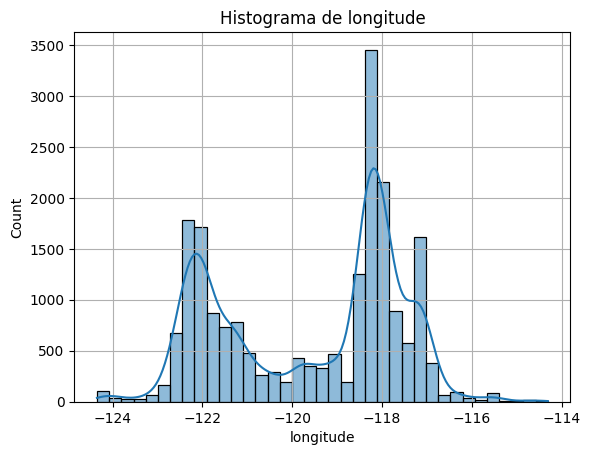

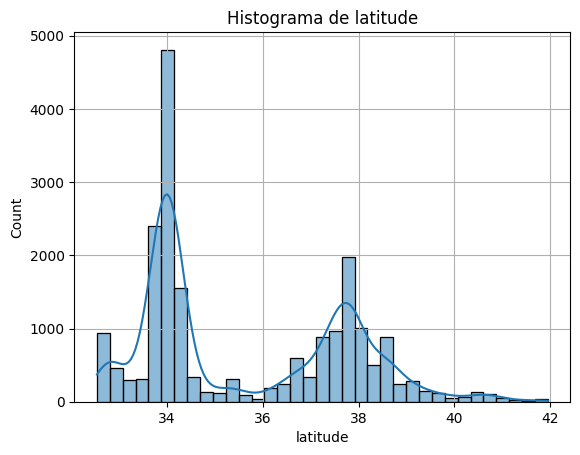

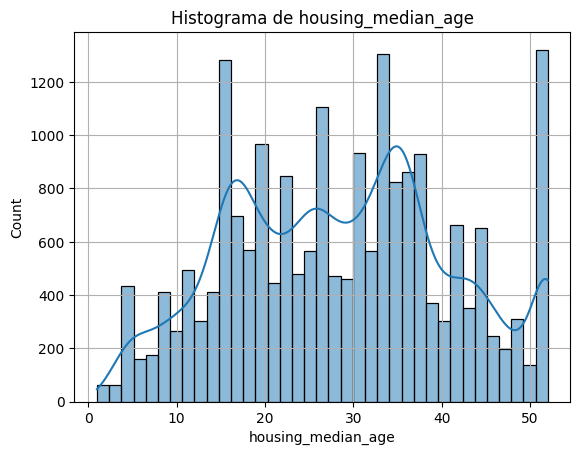

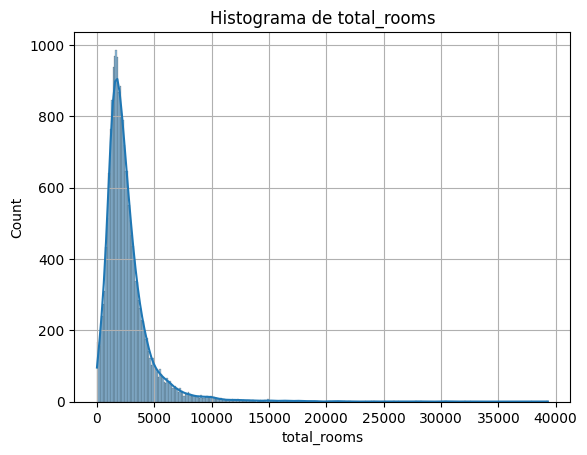

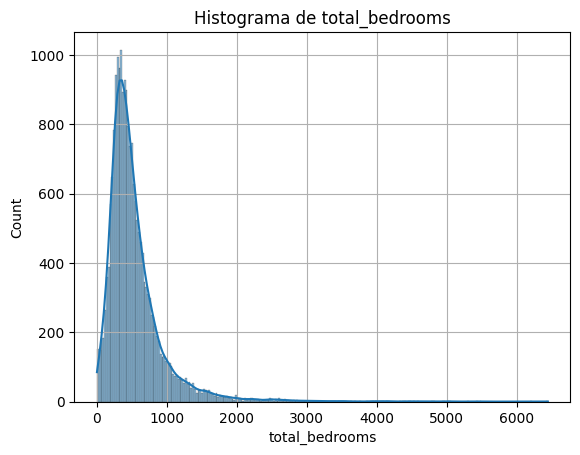

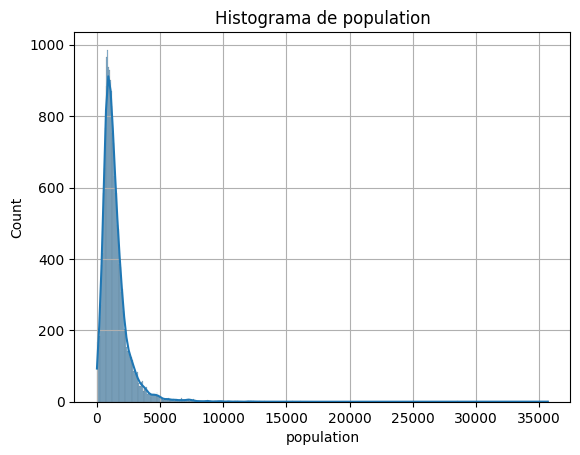

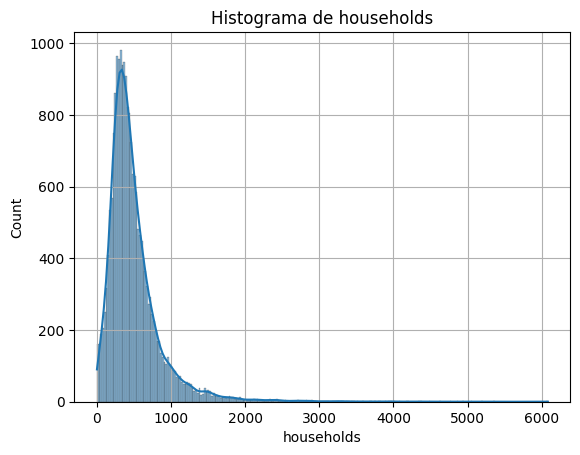

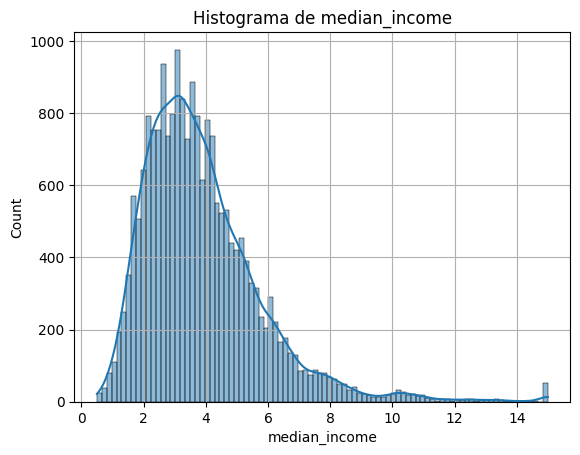

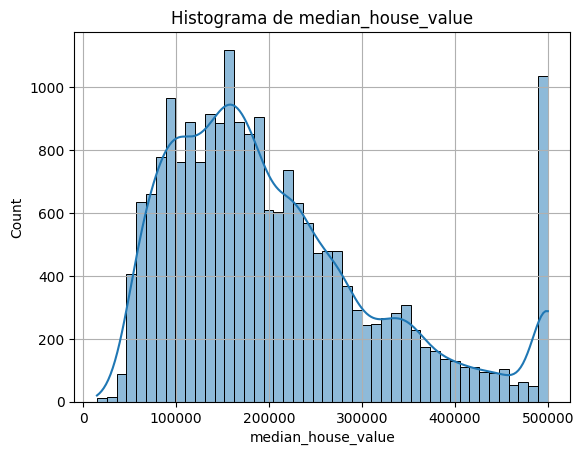

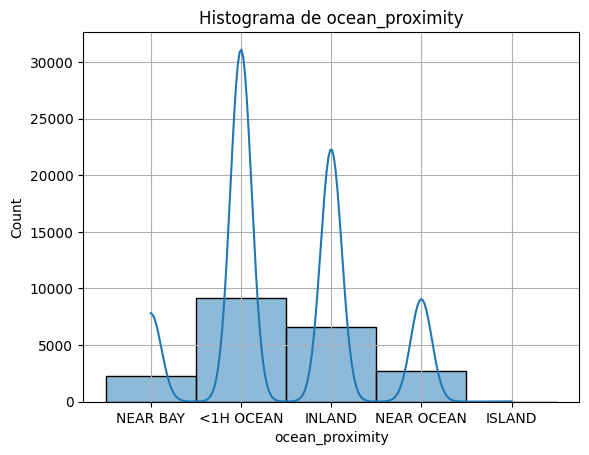

In [16]:
# Histogramas de las variables

for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Histograma de {column}')
    plt.grid()
    plt.show()

### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 50% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 75% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 100% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


Veamos un ejemplo:



In [17]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]


6.0

88.5
52.5


{'whiskers': [<matplotlib.lines.Line2D at 0x74913b62ecc0>,
 'caps': [<matplotlib.lines.Line2D at 0x74913ba84320>,
 'boxes': [<matplotlib.lines.Line2D at 0x74913b645eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x74913ba86e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x74913b709070>],
 'means': []}

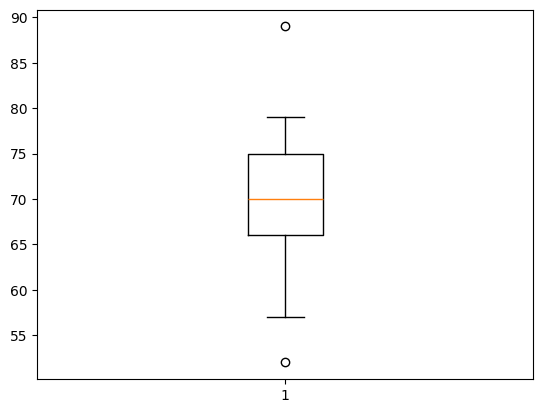

In [18]:
IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)

Por lo tanto, entre el conjunto de datos, el 52 y el 89 son outliers.

7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

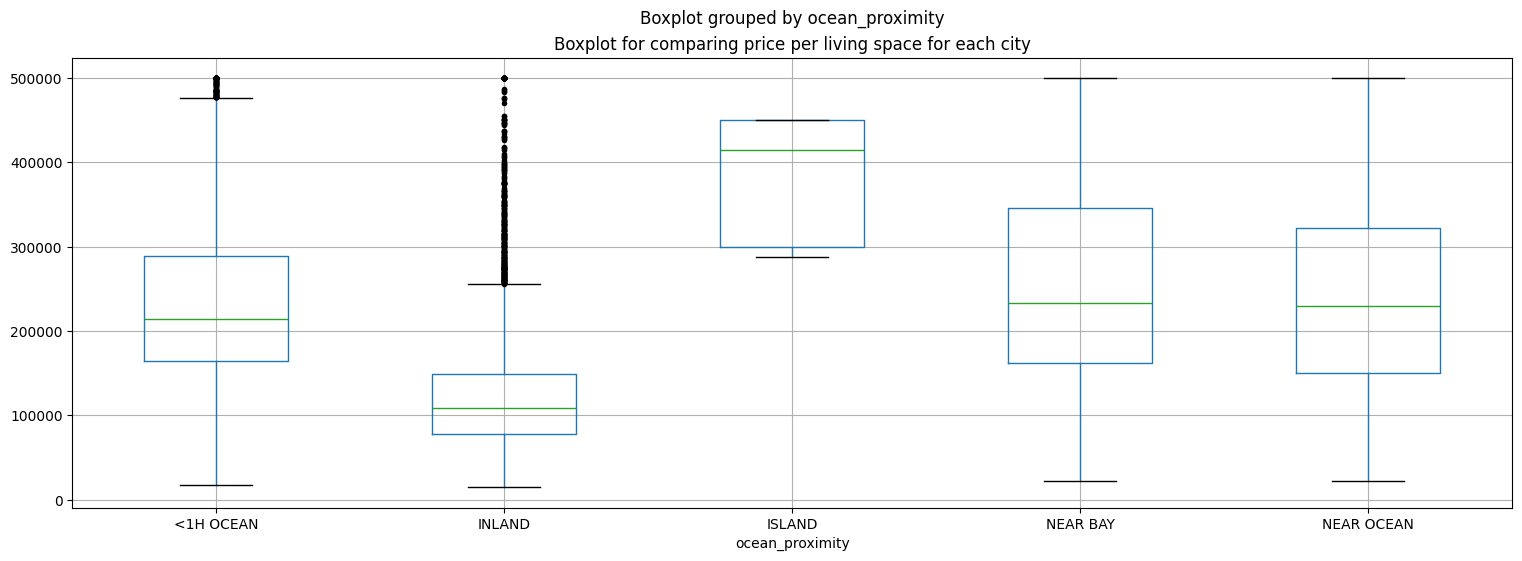

In [9]:
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

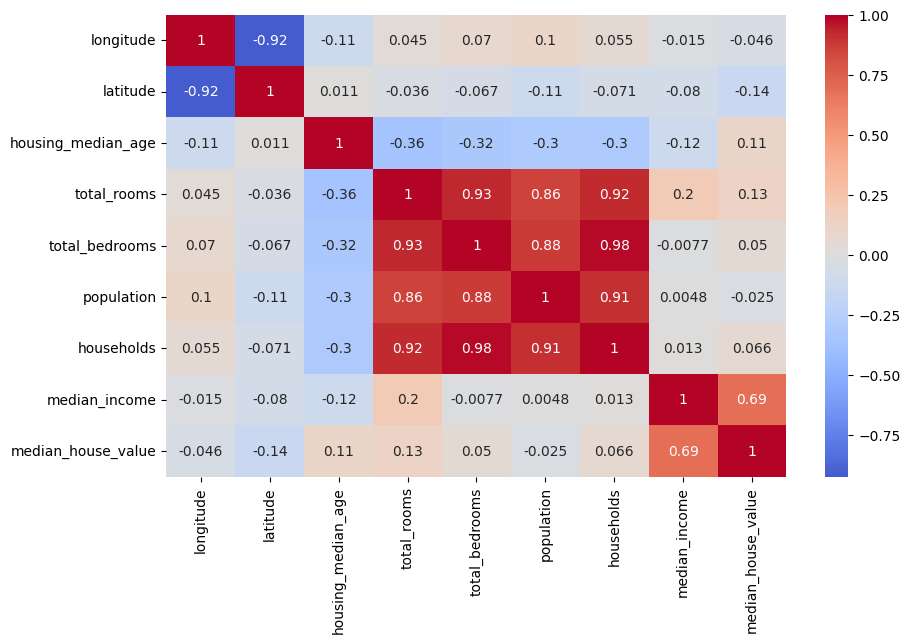

In [10]:
# Para obtener la matriz de correlación con variables numéricas

numerical_df=df.select_dtypes(include=['float', 'int'])
corr_matrix = numerical_df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()


9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

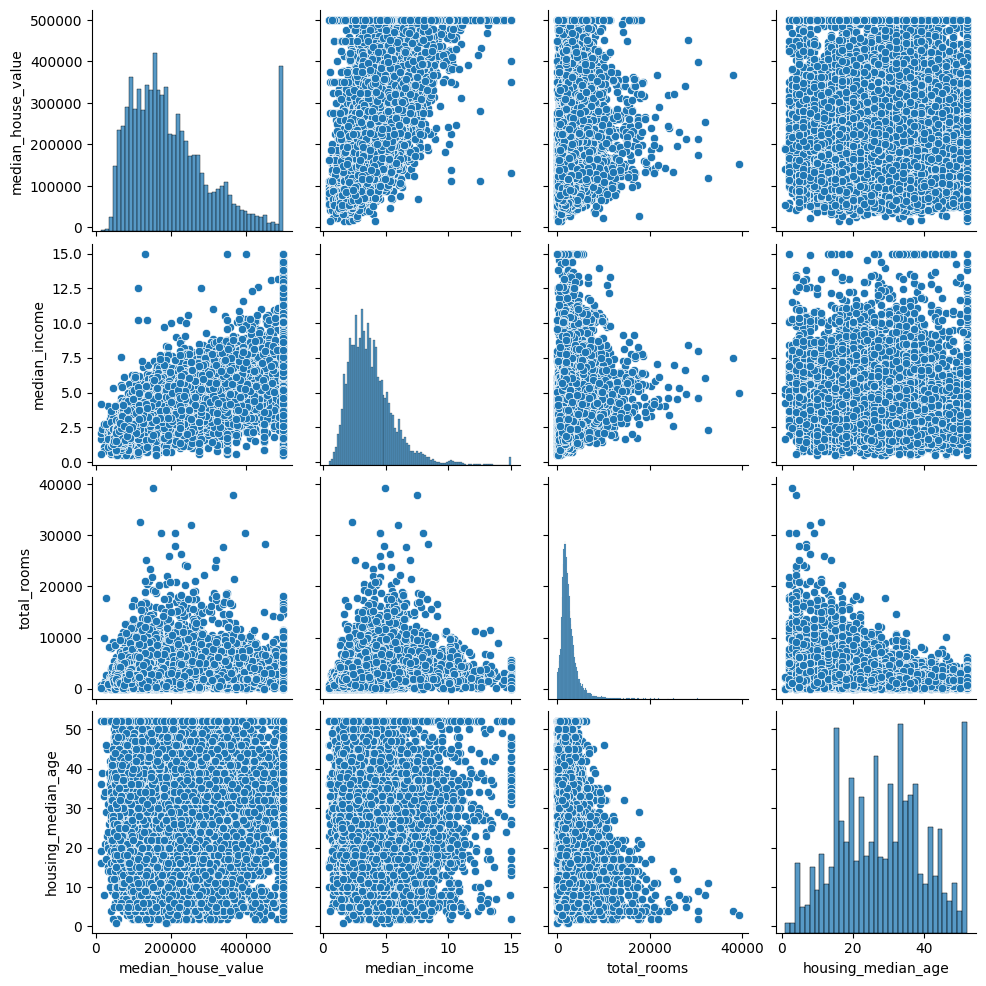

In [11]:
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
sns.pairplot(df[cols])
plt.show()  


10. Realiza un scatter plot con la libreria seaborn de python, el color del grafico puede ser empleado con la columna median_house_value

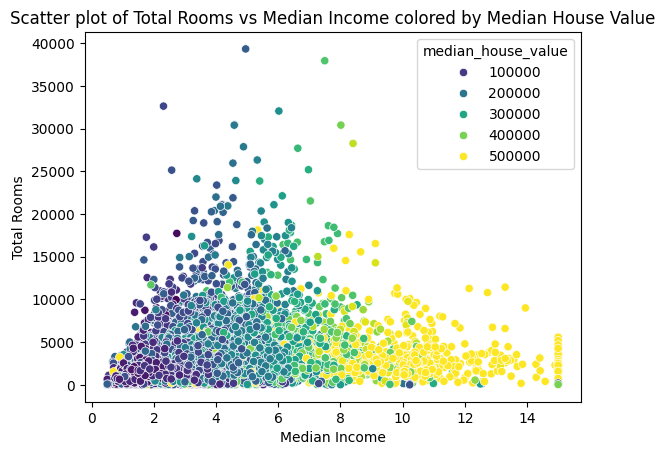

In [ ]:
sns.scatterplot(data=df, x='median_income', y='total_rooms', hue='median_house_value', palette='viridis')
plt.title('Scatter plot of Total Rooms vs Median Income colored by Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Total Rooms')
plt.show()

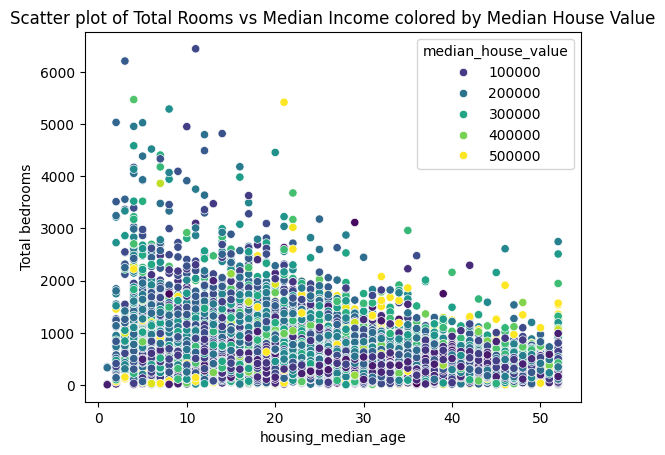

In [13]:
sns.scatterplot(data=df, x='housing_median_age', y='total_bedrooms', hue='median_house_value', palette='viridis')
plt.title('Scatter plot of Total Rooms vs Median Income colored by Median House Value')
plt.xlabel('housing_median_age')
plt.ylabel('Total bedrooms')
plt.show()

# 2. Preparacion del data frame

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.

11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```

In [14]:
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16512
4128


In [15]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [16]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

<Axes: >

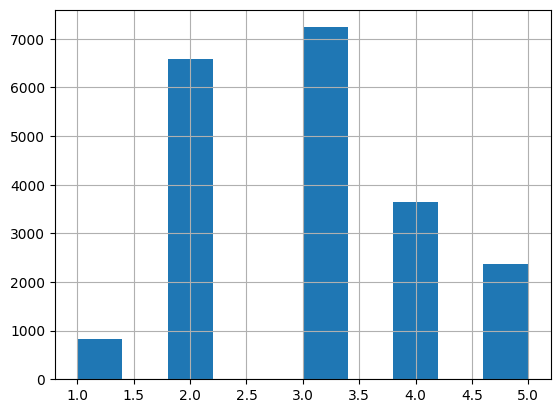

In [17]:
# Está creando una variable categórica que agrupa la variable median_income en 5 rangos
# Esto se hace porque median_income es una variable muy importante para predecir precios de casas, pero está desbalanceada. Algunas categorías de ingresos están muy poco representadas.
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()

In [ ]:
# Divide el dataset de forma que cada categoría de income_cat conserve la misma proporción en el train y en el test

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [ ]:
# Comparación de las proporciones de las categorías de income_cat en el dataset original, en el train y en el test

df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)

income_cat
3    0.348716
2    0.324188
4    0.173147
5    0.114159
1    0.039789
Name: count, dtype: float64

In [ ]:
# Crear un DataFrame con las proporciones 

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

# calcula los errores porcentuales

compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

In [21]:
compare_props


,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,0.015195
3,0.350581,0.350533,0.358527,2.266446,0.013820
4,0.176308,0.176357,0.167393,5.056334,0.027480
5,0.114438,0.114341,0.109496,4.318374,0.084674


Los resultados obtenidos muestran que el muestreo estratificado preserva casi a la perfección las proporciones originales del dataset, con errores inferiores al 0.1%. Por otro lado, el muestreo aleatorio introduce desviaciones notables que oscilan entre el 1% y el 5%, afectando especialmente a las categorías menos representadas. Esto evidencia que el muestreo aleatorio no garantiza que el conjunto de prueba sea realmente representativo de la distribución original. Por el contrario, el muestreo estratificado sí asegura que las proporciones de la variable clave (income_cat) se mantengan adecuadamente, evitando así el sampling bias y proporcionando un conjunto de prueba mucho más fiable para evaluar modelos.

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```

In [22]:
train_set["rooms_per_household"] = train_set["total_rooms"]/train_set["households"] # Número de habitaciones por hogar
train_set["bedrooms_per_room"] = train_set["total_bedrooms"]/train_set["total_rooms"] # Número de habitaciones por cuarto
train_set["population_per_household"]=train_set["population"]/train_set["households"] # Población por hogar

train_set


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,3,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,3,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,3,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,2,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,3,6.268421,0.180940,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN,5,6.129032,0.151128,3.032258
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND,3,6.868597,0.184825,3.904232
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN,2,3.986717,0.270823,3.332068
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN,4,6.395349,0.166993,3.178891


# 3. Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

## imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

In [23]:
train_set.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
income_cat                  0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

In [24]:
test_set.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
income_cat              0
dtype: int64

In [25]:
test_set['total_bedrooms'] = test_set['total_bedrooms'].fillna(test_set['total_bedrooms'].median())

test_set.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
income_cat            0
dtype: int64

In [39]:
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = train_set.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

# Devuelve la media de cada columna numérica
imp_mean.statistics_


array([-1.19582290e+02,  3.56431492e+01,  2.86082849e+01,  2.64200478e+03,
        5.38496851e+02,  1.42645300e+03,  4.99986919e+02,  3.88075426e+00,
        2.07194694e+05,  3.01296027e+00,  5.43523502e+00,  2.12857974e-01,
        3.09696119e+00])


14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

In [ ]:
# Media de cada Columna numérica
 
imp_mean.statistics_

array([-1.19519360e+02,  3.55867103e+01,  2.87642926e+01,  2.61079627e+03,
        5.29855862e+02,  1.42157171e+03,  4.97750727e+02,  3.83033798e+00,
        2.05500310e+05,  2.98158915e+00])

In [40]:
df_train_num = train_set.drop("ocean_proximity", axis=1)
df_train_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,3,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,3,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,3,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,2,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,3,6.268421,0.180940,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,5,6.129032,0.151128,3.032258
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,3,6.868597,0.184825,3.904232
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,2,3.986717,0.270823,3.332068
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,4,6.395349,0.166993,3.178891


In [41]:
# Tuve que convertir todas las variables a float para que no me diera error

df_train_num = df_train_num.astype(float)
df_train_num.median()


longitude                     -118.510000
latitude                        34.260000
housing_median_age              29.000000
total_rooms                   2129.000000
total_bedrooms                 437.000000
population                    1167.000000
households                     410.000000
median_income                    3.545800
median_house_value          179850.000000
income_cat                       3.000000
rooms_per_household              5.235874
bedrooms_per_room                0.202808
population_per_household         2.817240
dtype: float64

# 4. Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```python

from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

```

In [35]:
# Se importa el codificador One-Hot de sklearn
from sklearn.preprocessing import OneHotEncoder

# Para ver los valores únicos de la columna categórica
train_set["ocean_proximity"].unique()

# Se extrae la columna categórica como un DataFrame (necesario para OneHotEncoder)
housing_cat = train_set[["ocean_proximity"]]
housing_cat  

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
...,...
11284,<1H OCEAN
11964,INLAND
5390,<1H OCEAN
860,<1H OCEAN


transform()

▸ convierte cada categoría original en un vector de 0s y 1s

▸ por ejemplo:

"<1H OCEAN" → [1 0 0 0 0]

"NEAR BAY" → [0 1 0 0 0]

In [36]:
# Se crea el codificador One-Hot y se le indica que se quiere un array denso (no disperso)
cat_encoder = OneHotEncoder(sparse_output=False)

# Se ajusta el codificador a la columna categórica y se transforman los datos
# Esto devuelve una matriz donde cada categoría se convierte en una columna binaria (0/1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# Matriz codificada
print(housing_cat_1hot)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [37]:
# Categorías detectadas por el codificador
print(cat_encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [42]:
# Convertir a DataFrame para que mantenga nombres de columnas
housing_tr = pd.DataFrame(train_set, columns=df_train_num.columns)

In [ ]:
# Se convierte la matriz NumPy codificada en un DataFrame con nombres de columnas adecuados
df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns=cat_encoder.categories_[0])

# Se une el DataFrame codificado con el resto del conjunto de entrenamiento procesado
housing_tr_ = housing_tr.join(df_cat_1hot)


In [44]:
housing_tr_

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,3,5.017657,0.200576,3.691814,1.0,0.0,0.0,0.0,0.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,3,4.473545,0.232703,1.738095,0.0,1.0,0.0,0.0,0.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,3,5.645833,0.174486,2.723214,NaN,NaN,NaN,NaN,NaN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,2,4.002817,0.258269,3.994366,1.0,0.0,0.0,0.0,0.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,3,6.268421,0.180940,2.300000,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,5,6.129032,0.151128,3.032258,1.0,0.0,0.0,0.0,0.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,3,6.868597,0.184825,3.904232,0.0,1.0,0.0,0.0,0.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,2,3.986717,0.270823,3.332068,1.0,0.0,0.0,0.0,0.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,4,6.395349,0.166993,3.178891,1.0,0.0,0.0,0.0,0.0


# 5. Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```

In [46]:
# Se define una lista con el nombre de las columnas que se desean escalar.
# Incluye tanto variables numéricas como las columnas categóricas codificadas con One-Hot.
cols = [
    "longitude", "latitude", "housing_median_age", "total_rooms",
    "total_bedrooms", "population", "households", "median_income",
    "<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"
]

# Se seleccionan esas columnas del DataFrame 'housing_tr_' 
# para construir un nuevo DataFrame solo con las variables que se van a escalar.
housing_scale = housing_tr_[cols]
housing_scale

# Se importa el escalador MinMaxScaler, que transforma cada característica
# a un rango entre 0 y 1.
from sklearn.preprocessing import MinMaxScaler

# Se crea una instancia del escalador MinMaxScaler.
scaler = MinMaxScaler()

# El escalador se ajusta a los datos seleccionados.
# En esta etapa calcula el mínimo y máximo de cada columna.
scaler.fit(housing_scale)

# Se transforman los datos aplicando la fórmula:
# (x - min) / (max - min) para cada columna.
X = scaler.transform(housing_scale)

# Se crea un nuevo DataFrame con los datos transformados,
# manteniendo los nombres originales de las columnas.
housing_prepared = pd.DataFrame(X, columns=housing_scale.columns)
housing_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.729084,0.017021,0.627451,0.079455,0.097145,0.064380,0.102286,0.190322,1.0,0.0,0.0,0.0,0.0
1,0.616534,0.129787,0.941176,0.085966,0.121974,0.036744,0.124157,0.228452,0.0,1.0,0.0,0.0,0.0
2,0.385458,0.224468,0.058824,0.048197,0.051210,0.025561,0.055090,0.252162,NaN,NaN,NaN,NaN,NaN
3,0.721116,0.014894,0.686275,0.036090,0.056797,0.039659,0.058214,0.099488,1.0,0.0,0.0,0.0,0.0
4,0.453187,0.450000,0.823529,0.060532,0.066729,0.024412,0.062325,0.210638,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.636454,0.130851,0.666667,0.033776,0.031037,0.018358,0.035520,0.404829,1.0,0.0,0.0,0.0,0.0
16508,0.689243,0.156383,0.627451,0.078386,0.088299,0.049048,0.073672,0.175867,0.0,1.0,0.0,0.0,0.0
16509,0.594622,0.157447,0.686275,0.053385,0.088144,0.049133,0.086499,0.167894,1.0,0.0,0.0,0.0,0.0
16510,0.238048,0.535106,0.274510,0.090874,0.092489,0.049721,0.091761,0.359947,1.0,0.0,0.0,0.0,0.0


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estratificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

    1. ¿que puede concluir respecto al modelo empleado?
    2. ¿El modelo de regresión lineal es valido para lo construido,
    3. ¿qué informacion nos da el score?
    4. ¿Puede ser ajustado a otro modelo?
    5. ¿Como puede autmatizar todo el proceso empleando pipelines?

### Cargar el dataset

In [105]:
url = 'https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv'
df = pd.read_csv(url)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Crear el income_cat para estratificación

In [106]:
df["income_cat"] = pd.cut(
    df["median_income"],
    bins=[0., 1.5, 3., 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


### Split estratificado

In [107]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(df, df["income_cat"]):
    train_set = df.iloc[train_idx].copy()
    test_set  = df.iloc[test_idx].copy()


In [108]:
train_set["rooms_per_household"] = train_set["total_rooms"]/train_set["households"] # Número de habitaciones por hogar
train_set["bedrooms_per_room"] = train_set["total_bedrooms"]/train_set["total_rooms"] # Número de habitaciones por cuarto
train_set["population_per_household"]=train_set["population"]/train_set["households"] # Población por hogar

train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3,6.297405,0.183835,2.411178


In [109]:
test_set["rooms_per_household"] = test_set["total_rooms"]/test_set["households"] # Número de habitaciones por hogar
test_set["bedrooms_per_room"] = test_set["total_bedrooms"]/test_set["total_rooms"] # Número de habitaciones por cuarto
test_set["population_per_household"]=test_set["population"]/test_set["households"] # Población por hogar

test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5,6.715625,0.156972,2.275000
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4,7.137809,0.151980,3.021201
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3,5.283636,0.185822,2.938182
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3,5.491694,0.196612,3.561462
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3,6.154723,0.162477,2.434853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2,6.108696,0.189947,3.279891
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2,3.138298,0.332203,4.503546
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4,4.974860,0.192027,1.851955
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4,5.026699,0.198938,2.623786


### Quitar el income_cat

In [110]:
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)


### Separar columna categórica

In [111]:
train_cat = train_set[["ocean_proximity"]]
test_cat = test_set[["ocean_proximity"]]


### OneHotEncoder

In [112]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
train_cat_1hot = cat_encoder.fit_transform(train_cat)
test_cat_1hot  = cat_encoder.transform(test_cat)


### Imputación

In [113]:
from sklearn.impute import SimpleImputer

num_cols = train_set.drop("ocean_proximity", axis=1).columns

imputer = SimpleImputer(strategy="median")
train_num = imputer.fit_transform(train_set[num_cols])
test_num  = imputer.transform(test_set[num_cols])


### Escalado

In [114]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_num)
test_scaled  = scaler.transform(test_num)


### Sets Finales

In [115]:
housing_prepared_train = pd.DataFrame(
    np.hstack([train_scaled, train_cat_1hot]),
    columns=list(num_cols) + list(cat_encoder.categories_[0])
)

housing_prepared_test = pd.DataFrame(
    np.hstack([test_scaled, test_cat_1hot]),
    columns=list(num_cols) + list(cat_encoder.categories_[0])
)


In [116]:
housing_prepared_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.117734,0.030938,0.117537,0.001993,0.0,1.0,0.0,0.0,0.0
1,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.545567,0.041176,0.067460,0.001554,0.0,0.0,0.0,0.0,1.0
2,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.139589,0.030281,0.101772,0.001232,0.0,1.0,0.0,0.0,0.0
3,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.201032,0.019575,0.196117,0.000939,0.0,0.0,0.0,0.0,1.0
4,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,0.460413,0.035276,0.091880,0.001992,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.725100,0.052072,0.254902,0.169380,0.197970,0.056700,0.186520,0.316554,0.522680,0.039267,0.094107,0.001072,1.0,0.0,0.0,0.0,0.0
16508,0.291833,0.634431,0.274510,0.200819,0.228737,0.133580,0.264376,0.159584,0.155465,0.031550,0.088864,0.002149,0.0,1.0,0.0,0.0,0.0
16509,0.162351,0.626993,0.921569,0.017831,0.026418,0.012753,0.031740,0.184811,0.258558,0.021168,0.149772,0.001586,1.0,0.0,0.0,0.0,0.0
16510,0.164343,0.613177,0.254902,0.080099,0.093106,0.033773,0.093167,0.254928,0.501237,0.036703,0.093150,0.001383,1.0,0.0,0.0,0.0,0.0


In [117]:
housing_prepared_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.593625,0.167906,0.549020,0.163835,0.162693,0.061128,0.178865,0.536662,1.000000,0.039674,0.063302,0.001274,1.0,0.0,0.0,0.0,0.0
1,0.391434,0.249734,0.450980,0.051229,0.049130,0.023880,0.052465,0.311030,0.304125,0.042672,0.057756,0.001874,1.0,0.0,0.0,0.0,0.0
2,0.587649,0.181722,0.686275,0.036806,0.043170,0.022562,0.050971,0.267858,0.390928,0.029502,0.095358,0.001807,1.0,0.0,0.0,0.0,0.0
3,0.622510,0.145590,0.666667,0.041893,0.052030,0.029962,0.055825,0.191094,0.298351,0.030980,0.107347,0.002309,1.0,0.0,0.0,0.0,0.0
4,0.725100,0.024442,0.725490,0.095971,0.098582,0.041817,0.114264,0.265720,0.348454,0.035689,0.069419,0.001402,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,0.703187,0.125399,0.352941,0.057028,0.068460,0.033745,0.068335,0.159798,0.195878,0.035362,0.099941,0.002082,1.0,0.0,0.0,0.0,0.0
4124,0.608566,0.154091,0.627451,0.022358,0.047036,0.035511,0.052278,0.114592,0.214022,0.014263,0.258004,0.003067,1.0,0.0,0.0,0.0,0.0
4125,0.461155,0.201913,0.823529,0.045149,0.054768,0.018498,0.066468,0.289658,0.574845,0.027308,0.102252,0.000933,1.0,0.0,0.0,0.0,0.0
4126,0.641434,0.115834,0.568627,0.052526,0.066044,0.030214,0.076550,0.304313,0.661236,0.027677,0.109931,0.001554,1.0,0.0,0.0,0.0,0.0


# Entrenamiento del modelo

<Axes: >

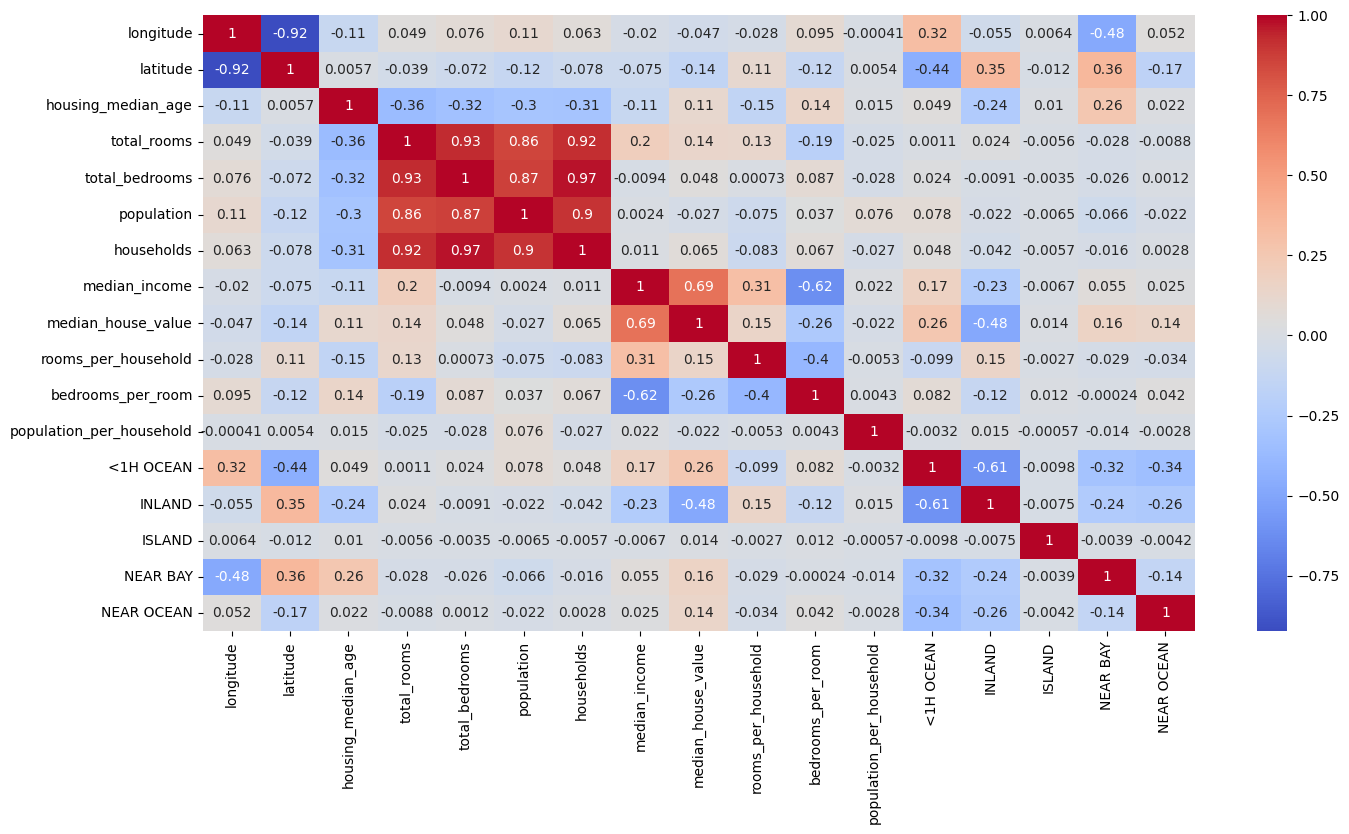

In [118]:
plt.figure(figsize = (16,8))
sns.heatmap(housing_prepared_train.corr(), annot=True, cmap="coolwarm")

In [119]:
Xtrain=housing_prepared_train.drop("median_house_value", axis=1)
ytrain=housing_prepared_train["median_house_value"]

In [120]:
Xtest=housing_prepared_test.drop("median_house_value", axis=1)
ytest=housing_prepared_test["median_house_value"]

In [121]:
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()
modelo.fit(Xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [122]:
# Resultados del modelo
coeficientes = pd.DataFrame({
    'Variable': Xtrain.columns,
    'Coeficiente': modelo.coef_
})

print("Intercepto:", modelo.intercept_)
print(coeficientes)


Intercepto: 0.4398922066634243
                    Variable  Coeficiente
0                  longitude    -0.579594
1                   latitude    -0.514185
2         housing_median_age     0.116503
3                total_rooms     0.303110
4             total_bedrooms     0.010058
5                 population    -3.040770
6                 households     1.260884
7              median_income     1.228381
8        rooms_per_household     0.808903
9          bedrooms_per_room     0.547810
10  population_per_household     0.202014
11                 <1H OCEAN    -0.036189
12                    INLAND    -0.106757
13                    ISLAND     0.218030
14                  NEAR BAY    -0.045887
15                NEAR OCEAN    -0.029197


In [123]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = modelo.predict(Xtest)

# Cálculo de métricas
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)


print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error absoluto medio (MAE): 0.10
Coeficiente de determinación (R²): 0.66


## Modelo con las variables más correlacionadas con la variable objetivo

In [124]:
features = [
    "median_income",
    "housing_median_age",
    "rooms_per_household",
    "bedrooms_per_room",
    "population_per_household",
    "NEAR BAY"
]

In [125]:
Xtrain[features]

,median_income,housing_median_age,rooms_per_household,bedrooms_per_room,population_per_household,NEAR BAY
0,0.115426,0.549020,0.030938,0.117537,0.001993,0.0
1,0.402574,0.117647,0.041176,0.067460,0.001554,0.0
2,0.163798,0.843137,0.030281,0.101772,0.001232,0.0
3,0.119067,0.450980,0.019575,0.196117,0.000939,0.0
4,0.275617,0.509804,0.035276,0.091880,0.001992,0.0
...,...,...,...,...,...,...
16507,0.316554,0.254902,0.039267,0.094107,0.001072,0.0
16508,0.159584,0.274510,0.031550,0.088864,0.002149,0.0
16509,0.184811,0.921569,0.021168,0.149772,0.001586,0.0
16510,0.254928,0.254902,0.036703,0.093150,0.001383,0.0


In [126]:
modelo=LinearRegression()
modelo.fit(Xtrain[features], ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [127]:
coeficientes = pd.DataFrame({
    'Variable': Xtrain[features].columns,
    'Coeficiente': modelo.coef_
})

print("Intercepto:", modelo.intercept_)
print(coeficientes)

Intercepto: -0.1769063948329646
                   Variable  Coeficiente
0             median_income     1.560107
1        housing_median_age     0.153143
2       rooms_per_household     0.070706
3         bedrooms_per_room     0.962068
4  population_per_household    -1.104797
5                  NEAR BAY     0.053134


In [128]:
y_pred = modelo.predict(Xtest[features])

# Cálculo de métricas
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)


print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error absoluto medio (MAE): 0.12
Coeficiente de determinación (R²): 0.55


El modelo de regresión lineal logró capturar una parte de la relación entre las distintas características y el valor de las viviendas, pero su capacidad predictiva no fue la mejor. Al emplear todas las características disponibles, el modelo alcanzó un coeficiente de determinación ($R^2$) de $0.66$, el cual bajo a $0.55$ al utilizar únicamente las variables más correlacionadas. 

El $R^2$, que es el score de regresión lineal en Scikit-Learn, muestra qué proporción de la variabilidad del valor de la vivienda explica el modelo y qué tan bien se ajusta. Básicamente, indica qué tan bueno es el modelo de regresión lineal. 

Si bien la regresión lineal es funcional, estos resultados sugieren que no es el modelo más adecuado para este conjunto de datos. Para mejorar el rendimiento en este tipo de problema, se recomienda explorar alternativas más potentes que puedan capturar relaciones no lineales e interacciones complejas entre variables, como son el Random Forest Regressor, el Gradient Boosting (o XGBoost), el Decision Tree Regressor, una regresión lineal con características polinomiales, o incluso redes neuronales simples